In [4]:
import numpy as np

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [26]:
cData = pd.read_csv('auto-mpg.csv')
cData.shape

(398, 9)

In [27]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
cData = cData.drop('car name', axis=1)

In [29]:
cData['origin'] = cData['origin'].replace({1:'america', 2:'europe', 3: 'asia'})

In [30]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [31]:
# cData = pd.get_dummies(cData, columns=['origin'])
cData = pd.get_dummies(cData, columns=['origin'])
# cData.head()

In [32]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


In [33]:
cData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [35]:
cData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
dtype: object

In [36]:
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())

In [37]:
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [39]:
cData[hpIsDigit['horsepower'] == False].count()

mpg               6
cylinders         6
displacement      6
horsepower        6
weight            6
acceleration      6
model year        6
origin_america    6
origin_asia       6
origin_europe     6
dtype: int64

In [41]:
cData = cData.replace('?',np.nan)
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [42]:
cData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [46]:
medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['horsepower'] = cData['horsepower'].astype('float64')

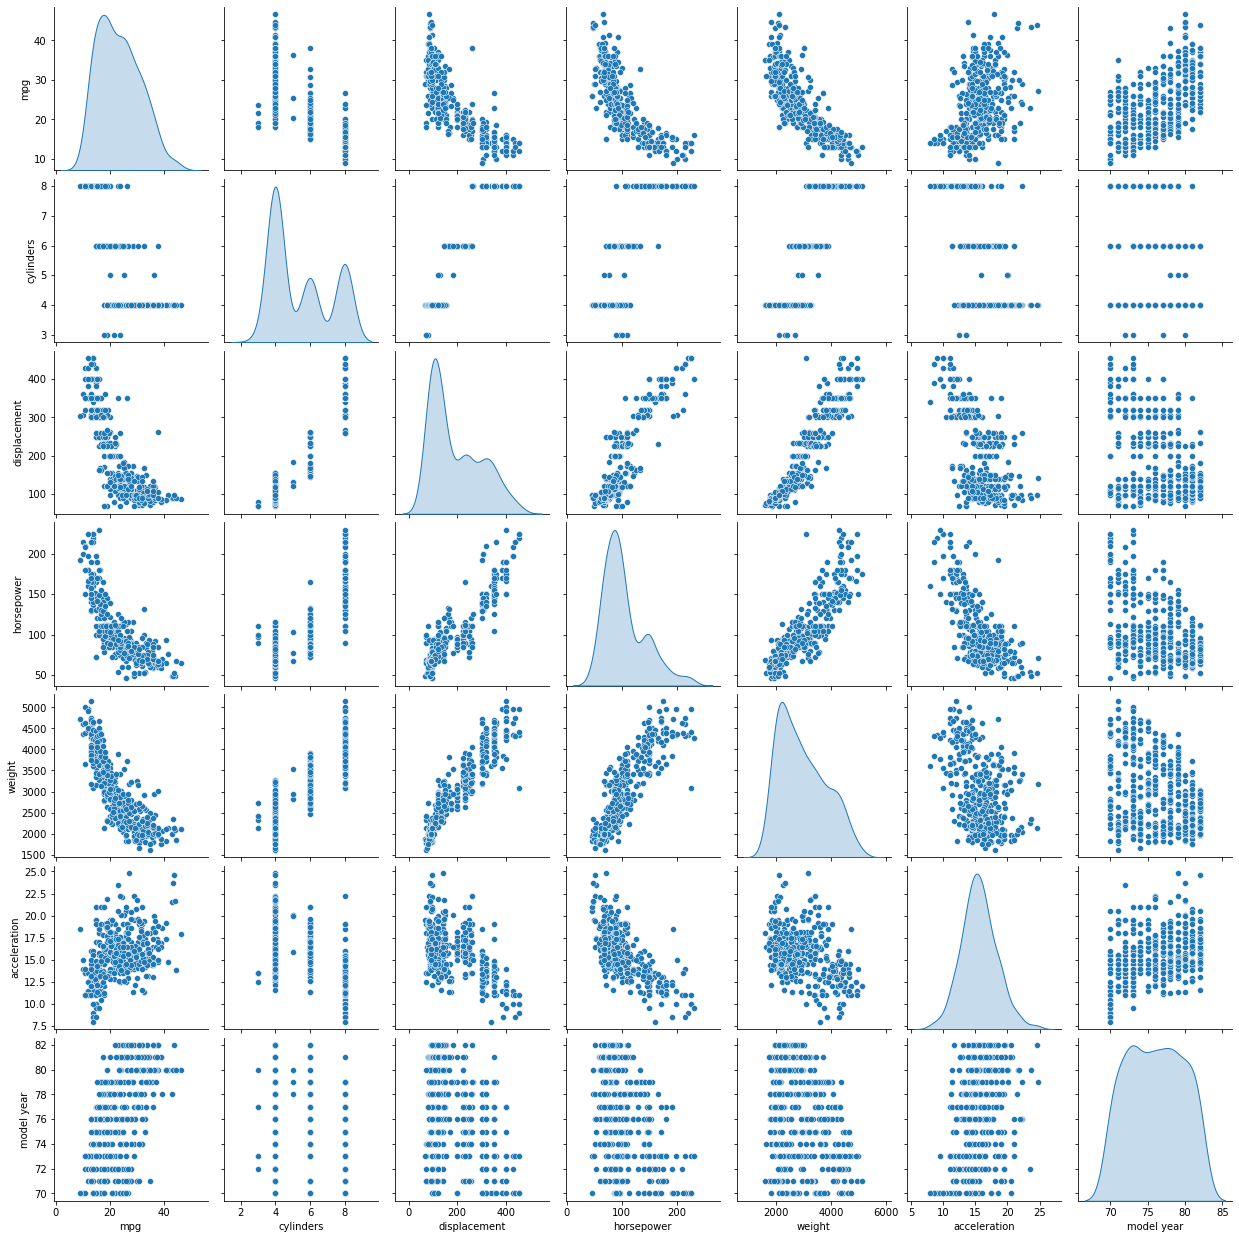

In [50]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')

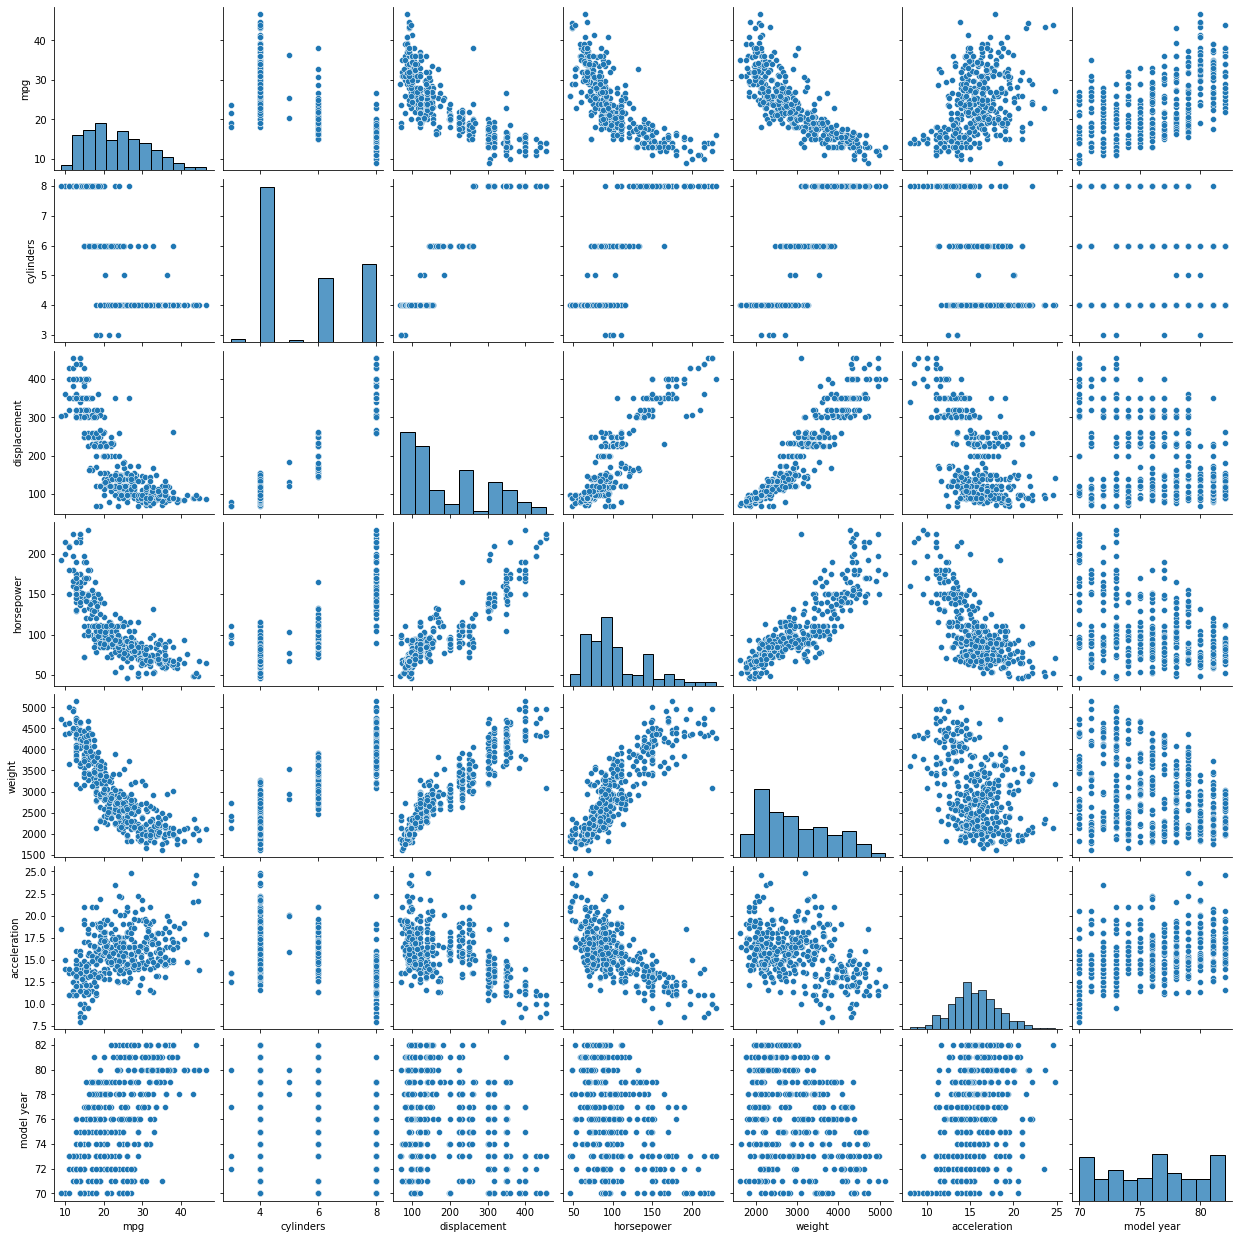

In [49]:
sns.pairplot(cData_attr)

In [56]:
X = cData.drop(['mpg','origin_europe'], axis=1)
y = cData[['mpg']]

In [57]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [58]:
regression_model = LinearRegression()

In [61]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [63]:
for idx, col_name in enumerate(X_train.columns): 
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.3948079661648215
The coefficient for displacement is 0.0289455107654872
The coefficient for horsepower is -0.021752207723546583
The coefficient for weight is -0.007352032065147354
The coefficient for acceleration is 0.061919366007619644
The coefficient for model year is 0.8369338917644997
The coefficient for origin_america is -3.0012830009185167
The coefficient for origin_asia is -0.6060179643247362


In [65]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -18.283451116372152


In [68]:
regression_model.score(X_train, y_train)

0.8141025501610559

In [70]:
regression_model.score(X_test, y_test)

0.8433135132808834

In [75]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
350,4,105.0,63.0,2215,14.9,81,1,0
59,4,97.0,54.0,2254,23.5,72,0,0
120,4,121.0,112.0,2868,15.5,73,0,0
12,8,400.0,150.0,3761,9.5,70,1,0
349,4,91.0,68.0,1985,16.0,81,0,1
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0
255,4,140.0,88.0,2720,15.4,78,1,0
72,8,304.0,150.0,3892,12.5,72,1,0
235,4,97.0,75.0,2265,18.2,77,0,1


In [76]:
X_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
174,6,171.0,97.0,2984,14.5,75,1,0
359,4,141.0,80.0,3230,20.4,81,0,0
250,8,318.0,140.0,3735,13.2,78,1,0
274,5,131.0,103.0,2830,15.9,78,0,0
283,6,232.0,90.0,3265,18.2,79,1,0
...,...,...,...,...,...,...,...,...
382,4,108.0,70.0,2245,16.9,82,0,1
39,8,400.0,175.0,4464,11.5,71,1,0
171,4,134.0,96.0,2702,13.5,75,0,1
271,4,156.0,105.0,2745,16.7,78,1,0


In [73]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

# print(y_pred)

print(poly_clf.score(X_train2, y_train))

0.9015975293463855


In [77]:
X_train2

array([[  1.,   4., 105., ...,  81.,   0.,   0.],
       [  1.,   4.,  97., ...,   0.,   0.,   0.],
       [  1.,   4., 121., ...,   0.,   0.,   0.],
       ...,
       [  1.,   8., 304., ...,  72.,   0.,   0.],
       [  1.,   4.,  97., ...,   0.,  77.,   0.],
       [  1.,   6., 232., ...,  71.,   0.,   0.]])

In [78]:
X_test2

array([[  1.,   6., 171., ...,  75.,   0.,   0.],
       [  1.,   4., 141., ...,   0.,   0.,   0.],
       [  1.,   8., 318., ...,  78.,   0.,   0.],
       ...,
       [  1.,   4., 134., ...,   0.,  75.,   0.],
       [  1.,   4., 156., ...,  78.,   0.,   0.],
       [  1.,   4.,  85., ...,   0.,  78.,   0.]])

In [79]:
print(poly_clf.score(X_test2, y_test))

0.8647441061366246


In [80]:
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)
